# Hackathon | EECE 490: Machine Learning

## **Team**: Stefanie Samaha


December 7, 2024

**GitHub Link:** https://github.com/stefsamaha/Behavioral-Smoking-Analysis-ML



## **Motivation**

Smoking remains one of the leading public health challenges worldwide, influenced by complex psychological, sociodemographic, and lifestyle factors. This miniproject aimed to uncover relationships between personality traits, lifestyle habits, and smoking behaviors using data-driven methods. The ultimate goal was to provide actionable insights for public health strategies, personalized interventions, and even marketing applications.


## **Key Goals**



*  Understand the **Relationship Between Personality Traits** and **Smoking Behavior**

Investigate whether traits like **conscientiousness** and **neuroticism** influence smoking frequency.

*   Explore **Lifestyle Clusters Using Machine Learning**

Group participants based on exercise frequency, social media usage, and smoking frequency to identify distinct patterns in behavior.

*   **Analyze Income and Brand Loyalty**

Examine how financial sufficiency and economic constraints influence brand-switching behavior and loyalty among smokers.

*   **Regional and Gender-Based Disparities**

Highlight differences in smoking behavior and dependence across genders and governorates.



## 1. Personality Traits and Smoking Behavior
The first segment of the project focused on **personality traits and their influence on smoking habits**.

### Steps:
1. **Mapped Survey Responses to Big Five Personality Traits**  
   Personality survey questions were mapped to numerical scores to compute the Big Five traits: **Extraversion, Agreeableness, Conscientiousness, Neuroticism, and Openness.**

2. **Encoded Smoking Frequency as a Target Variable**  
   Smoking frequency categories were mapped to numerical values (scale 1–4) to prepare the data for machine learning models.

3. **Correlation and Model Training**  
   - We examined the correlation between personality traits and smoking frequency using a heatmap.
   - Four predictive models—**Random Forest, XGBoost, SVR, and Linear Regression**—were trained and evaluated using MAE and R² metrics.



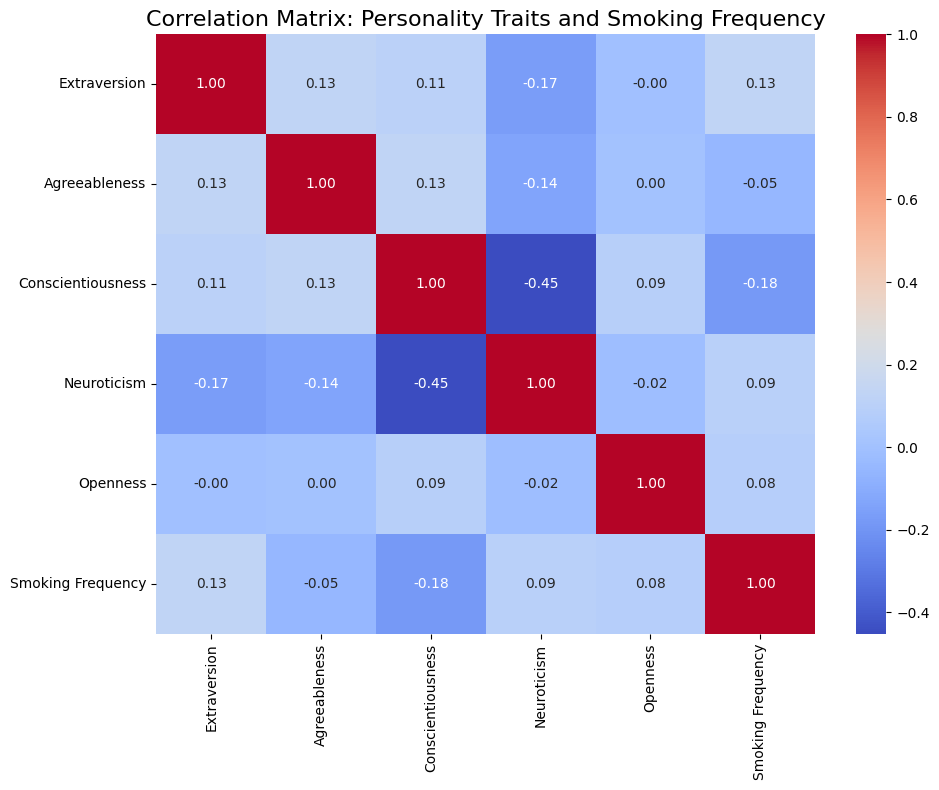


Model Comparison:
Random Forest: MAE = 0.69, R² = -0.07
XGBoost: MAE = 0.82, R² = -0.49
SVR: MAE = 0.73, R² = -0.15
Linear Regression: MAE = 0.75, R² = -0.09


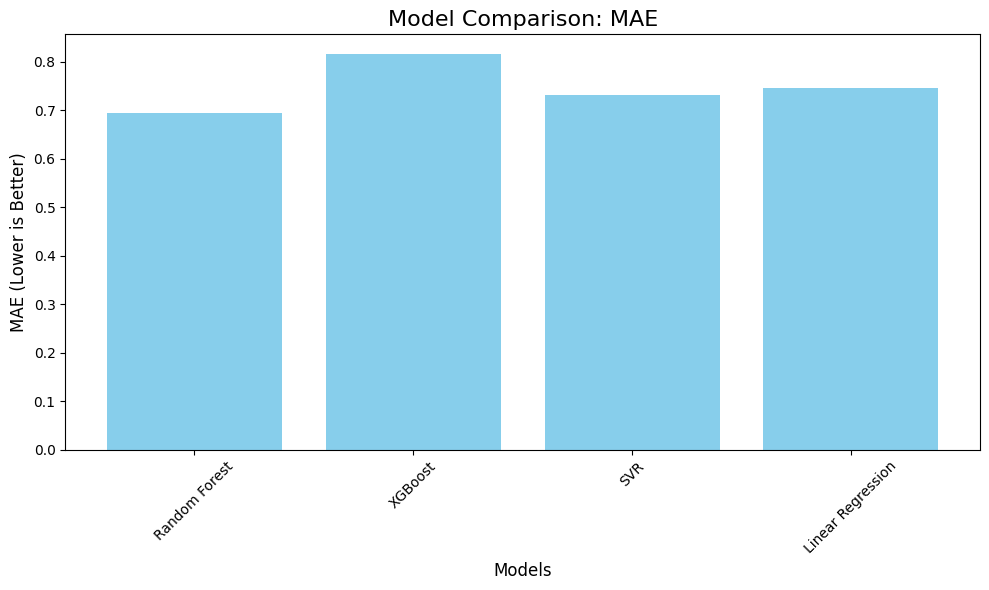

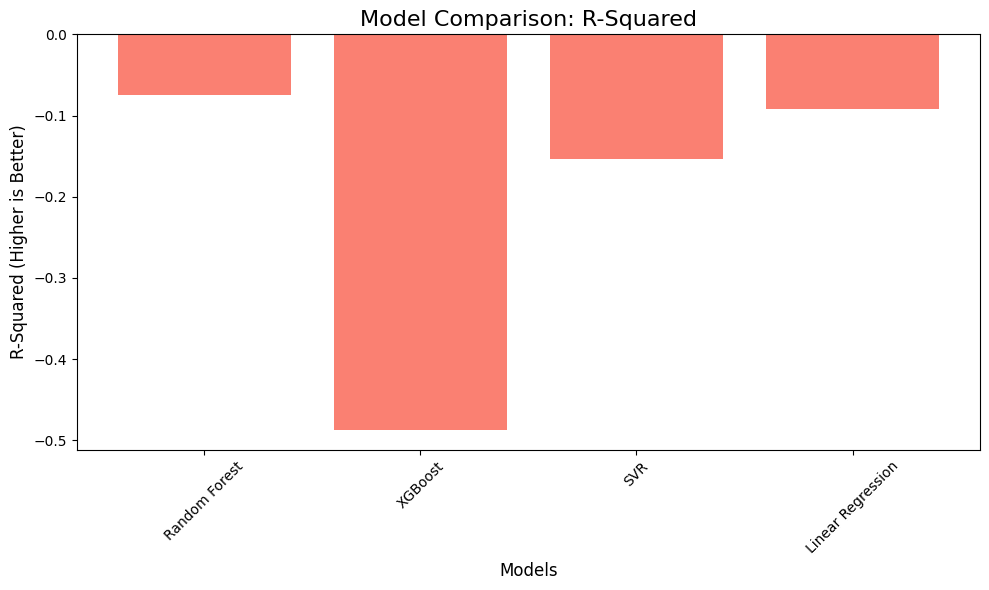

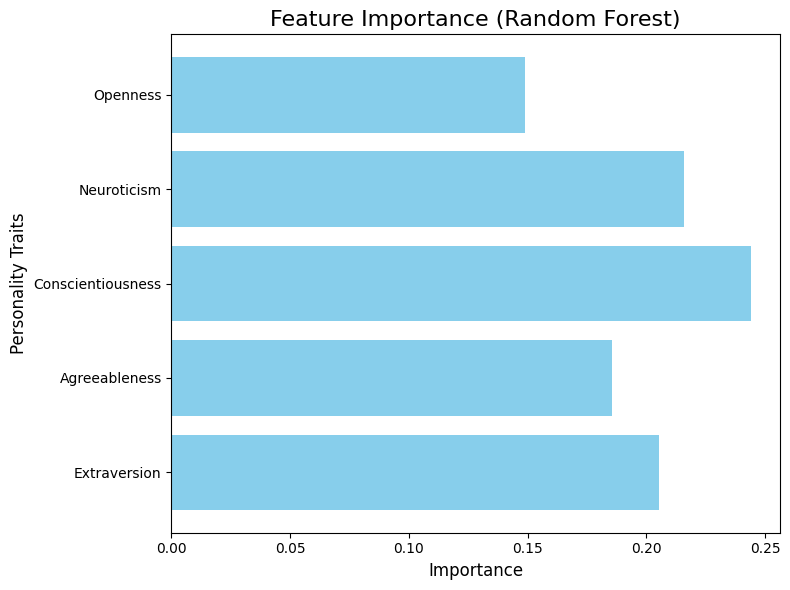

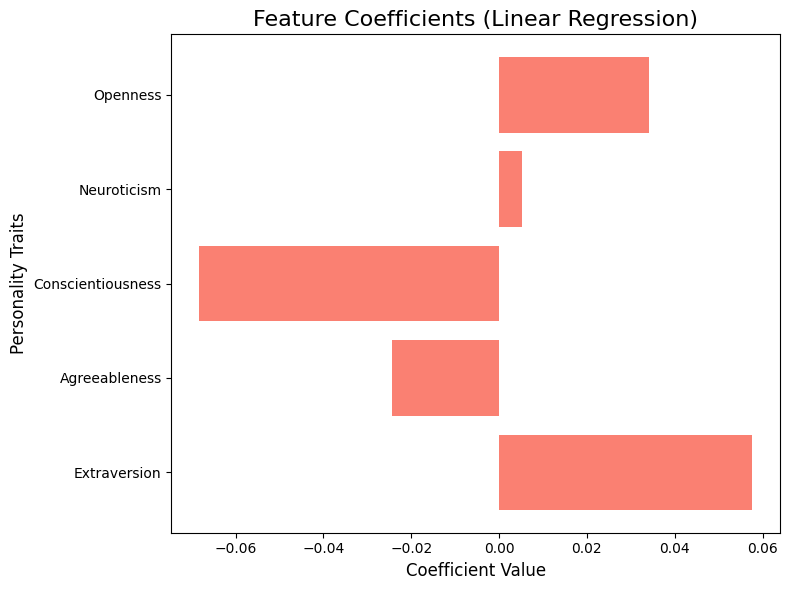

In [21]:
# ------------------------- Import Necessary Libraries -------------------------
# Libraries for data manipulation, visualization, and machine learning
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score
import xgboost as xgb

# ------------------------- Load the Dataset -------------------------
# Provide the path to the dataset
file_path = '/content/sample_data/2024_PersonalityTraits_SurveyData.xls'
df = pd.read_excel(file_path)  # Load the dataset into a DataFrame

# ------------------------- Step 1: Map Personality Questions to Numerical Scores -------------------------
# The dataset contains qualitative responses to personality questions (e.g., "Agree strongly").
# This step maps those responses to numerical scores for further analysis.

# Mapping qualitative responses to numerical values
response_mapping = {
    "Agree strongly": 5,
    "Agree moderately": 4,
    "Agree a little": 3,
    "Neither agree nor disagree": 2,
    "Disagree a little": 1,
    "Disagree moderately": 0,
    "Disagree strongly": -1
}

# List of columns representing personality-related survey questions
personality_columns = [
    "I see myself as someone who is extraverted, enthusiastic:",
    "I see myself as someone who is critical, quarrelsome:",
    "I see myself as someone who is dependable, self-disciplined:",
    "I see myself as someone who is anxious, easily upset:",
    "I see myself as someone who is open to new experiences:",
    "I see myself as someone who is reserved, quiet:",
    "I see myself as someone who is sympathetic, warm:",
    "I see myself as someone who is disorganized, careless:",
    "I see myself as someone who is calm, emotionally stable:",
    "I see myself as someone who is conventional, uncreative:"
]

# Apply mapping to each personality-related column
for column in personality_columns:
    df[column] = df[column].map(response_mapping)

# ------------------------- Step 2: Compute Big Five Traits -------------------------
# Big Five traits are derived from the personality questions.
# Each trait is calculated as the difference between two related questions.

# Calculate Big Five traits
df['Extraversion'] = df['I see myself as someone who is extraverted, enthusiastic:'] - \
                     df['I see myself as someone who is reserved, quiet:']
df['Agreeableness'] = df['I see myself as someone who is sympathetic, warm:'] - \
                      df['I see myself as someone who is critical, quarrelsome:']
df['Conscientiousness'] = df['I see myself as someone who is dependable, self-disciplined:'] - \
                          df['I see myself as someone who is disorganized, careless:']
df['Neuroticism'] = df['I see myself as someone who is anxious, easily upset:'] - \
                    df['I see myself as someone who is calm, emotionally stable:']
df['Openness'] = df['I see myself as someone who is open to new experiences:'] - \
                 df['I see myself as someone who is conventional, uncreative:']

# ------------------------- Step 3: Encode Smoking Frequency -------------------------
# Map smoking frequency categories to numerical values for prediction modeling.

target_mapping = {
    "10 or less cigarettes/day": 1,
    "11 to 20 cigarettes": 2,
    "21 to 30 cigarettes": 3,
    "More than 30 cigarettes": 4
}
df['Smoking Frequency'] = df['How many cigarettes do you smoke each day?'].map(target_mapping)

# Remove rows with missing data in Big Five traits or Smoking Frequency
df_cleaned = df[['Extraversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness', 'Smoking Frequency']].dropna()

# ------------------------- Step 4: Correlation Heatmap -------------------------
# Visualize the relationships between personality traits and smoking frequency.

plt.figure(figsize=(10, 8))
correlation_matrix = df_cleaned.corr()  # Calculate pairwise correlations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # Create a heatmap
plt.title("Correlation Matrix: Personality Traits and Smoking Frequency", fontsize=16)
plt.tight_layout()
plt.show()

# ------------------------- Step 5: Train-Test Split -------------------------
# Split the data into training and testing sets (80% training, 20% testing).

X = df_cleaned[['Extraversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness']]  # Features
y = df_cleaned['Smoking Frequency']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------------- Step 6: Train and Compare Models -------------------------
# Train and evaluate multiple machine learning models to predict smoking frequency.

models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42, objective='reg:squarederror'),
    "SVR": SVR(kernel='rbf'),
    "Linear Regression": LinearRegression()
}

# Store model performance metrics
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on the test set

    # Calculate performance metrics
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MAE": mae, "R²": r2}

# Display model performance
print("\nModel Comparison:")
for name, metrics in results.items():
    print(f"{name}: MAE = {metrics['MAE']:.2f}, R² = {metrics['R²']:.2f}")

# ------------------------- Step 7: Visualize Model Performance -------------------------
# Create bar plots to compare model performance.

# Bar plot for MAE
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), [metrics["MAE"] for metrics in results.values()], color='skyblue')
plt.title("Model Comparison: MAE", fontsize=16)
plt.ylabel("MAE (Lower is Better)", fontsize=12)
plt.xlabel("Models", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

# Bar plot for R²
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), [metrics["R²"] for metrics in results.values()], color='salmon')
plt.title("Model Comparison: R-Squared", fontsize=16)
plt.ylabel("R-Squared (Higher is Better)", fontsize=12)
plt.xlabel("Models", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

# ------------------------- Step 8: Feature Importance -------------------------
# Evaluate feature importance using Random Forest and Linear Regression.

# Random Forest feature importance
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_importance = rf.feature_importances_

# Plot feature importance for Random Forest
plt.figure(figsize=(8, 6))
plt.barh(X.columns, rf_importance, color='skyblue')
plt.title("Feature Importance (Random Forest)", fontsize=16)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Personality Traits", fontsize=12)
plt.tight_layout()
plt.show()

# Linear Regression feature coefficients
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_coefficients = lr.coef_

# Plot feature coefficients for Linear Regression
plt.figure(figsize=(8, 6))
plt.barh(X.columns, lr_coefficients, color='salmon')
plt.title("Feature Coefficients (Linear Regression)", fontsize=16)
plt.xlabel("Coefficient Value", fontsize=12)
plt.ylabel("Personality Traits", fontsize=12)
plt.tight_layout()
plt.show()


### What do we conclude from this first step?

---

1.**Model Comparison** (MAE) - Bar Chart Analysis

Random Forest has the lowest MAE, meaning it has the smallest average error in predicting smoking frequency. This makes it the best-performing model in terms of accuracy.
XGBoost, SVR, and Linear Regression follow, with similar MAE values but slightly worse performance compared to Random Forest.


---


2.**Correlation Matrix:**

The correlation matrix highlights the **relationship** between **personality traits** and **smoking frequency**:


*   Extraversion has a weak positive correlation with smoking frequency (0.13), suggesting that more extraverted individuals may smoke slightly more.
Conscientiousness shows a weak negative correlation (-0.18), indicating that more conscientious individuals are less likely to smoke frequently.
*   Neuroticism has a weak positive correlation (0.09), implying that emotionally unstable individuals may smoke slightly more.
*   Other traits, such as Agreeableness and Openness, have negligible correlations with smoking frequency.



---

3.**Feature Importance (Random Forest):**

The feature importance chart for the Random Forest model reveals:

*   Conscientiousness and Neuroticism are the most important predictors of smoking frequency. This aligns with the correlation findings, as these traits have the most noticeable relationships with smoking frequency.
*   Extraversion and Agreeableness also contribute to the predictions but to a lesser extent.
Openness is the least significant trait for predicting smoking frequency, as indicated by its low importance score.


---

**But either way**

The weak correlations observed in the heatmap suggest that personality traits alone cannot fully explain smoking behavior. However, the model-based feature importance shows that traits like Conscientiousness and Neuroticism still have predictive value when combined with other traits.





### Summary of Findings:
- **Conscientiousness** was the strongest predictor of smoking behavior, negatively correlating with smoking frequency.
- **Neuroticism** and **Social Influence** also had moderate predictive power.
- Random Forest emerged as the best-performing model, demonstrating the importance of nonlinear relationships in the data.

## What if we included additional variables?

Factors like stress levels, income, or social influences may enhance the model's predictive power. Let's try it out!

Missing values in X: 0
Missing values in y: 0
                        MAE        R²
Random Forest      0.606579 -0.010342
XGBoost            0.649626 -0.249086
SVR                0.597715 -0.045001
Linear Regression  0.652775 -0.137633


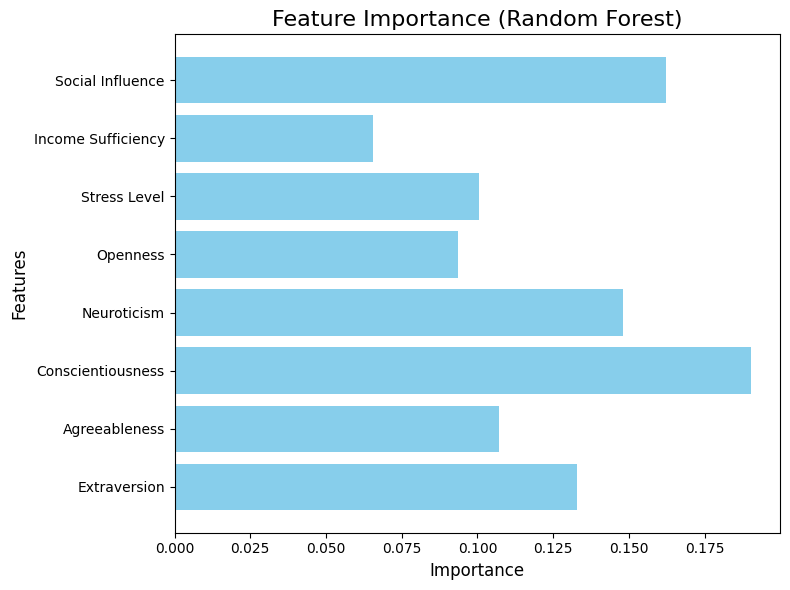

In [20]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score
import xgboost as xgb

# Load dataset
file_path = '/content/sample_data/2024_PersonalityTraits_SurveyData.xls'
df = pd.read_excel(file_path)

# ------------------- STEP 1: Map Personality Questions to Numerical Scores -------------------
# Personality trait questions have qualitative responses. This step maps them to numeric scores
response_mapping = {
    "Agree strongly": 5,
    "Agree moderately": 4,
    "Agree a little": 3,
    "Neither agree nor disagree": 2,
    "Disagree a little": 1,
    "Disagree moderately": 0,
    "Disagree strongly": -1
}
personality_columns = [
    "I see myself as someone who is extraverted, enthusiastic:",
    "I see myself as someone who is critical, quarrelsome:",
    "I see myself as someone who is dependable, self-disciplined:",
    "I see myself as someone who is anxious, easily upset:",
    "I see myself as someone who is open to new experiences:",
    "I see myself as someone who is reserved, quiet:",
    "I see myself as someone who is sympathetic, warm:",
    "I see myself as someone who is disorganized, careless:",
    "I see myself as someone who is calm, emotionally stable:",
    "I see myself as someone who is conventional, uncreative:"
]

# Apply response mapping to the dataset
for column in personality_columns:
    if column in df.columns:
        df[column] = df[column].map(response_mapping)

# ------------------- STEP 2: Compute Big Five Personality Traits -------------------
# Combining mapped columns to compute Big Five traits (Extraversion, Agreeableness, etc.)
df['Extraversion'] = df['I see myself as someone who is extraverted, enthusiastic:'] - \
                     df['I see myself as someone who is reserved, quiet:']
df['Agreeableness'] = df['I see myself as someone who is sympathetic, warm:'] - \
                      df['I see myself as someone who is critical, quarrelsome:']
df['Conscientiousness'] = df['I see myself as someone who is dependable, self-disciplined:'] - \
                          df['I see myself as someone who is disorganized, careless:']
df['Neuroticism'] = df['I see myself as someone who is anxious, easily upset:'] - \
                    df['I see myself as someone who is calm, emotionally stable:']
df['Openness'] = df['I see myself as someone who is open to new experiences:'] - \
                 df['I see myself as someone who is conventional, uncreative:']

# ------------------- STEP 3: Add Additional Features -------------------
# This section adds stress levels, income sufficiency, and social influence to the feature set
# Map "How often do you feel stressed?" responses to numerical values
stress_mapping = {
    "Never": 0,
    "Occasionally": 1,
    "Frequently": 2,
    "Constantly": 3
}
if "How often do you feel stressed?" in df.columns:
    df["Stress Level"] = df["How often do you feel stressed?"].map(stress_mapping)

# Map "How would you describe your current income sufficiency?" to numerical values
income_mapping = {
    "Extremely high: covers a wide range of luxury items": 4,
    "High: completely covers necessities with a few luxury items": 3,
    "Medium: covers all basic needs": 2,
    "Low: barely covers basic needs for a month": 1,
    "Very low income: does not cover basic needs for a month": 0
}
if "How would you describe your current income sufficiency?" in df.columns:
    df["Income Sufficiency"] = df["How would you describe your current income sufficiency?"].map(income_mapping)

# Convert "Number of smoker friends" to numeric
if "Of the five closest friends or acquaintances that you spend time with on a regular basis, how many of them are smokers?" in df.columns:
    df["Social Influence"] = pd.to_numeric(
        df["Of the five closest friends or acquaintances that you spend time with on a regular basis, how many of them are smokers?"],
        errors="coerce"
    ).fillna(0)

# ------------------- STEP 4: Encode Target Variable -------------------
# Map smoking frequency categories to numerical values
target_mapping = {
    "10 or less cigarettes/day": 1,
    "11 to 20 cigarettes": 2,
    "21 to 30 cigarettes": 3,
    "More than 30 cigarettes": 4
}
df["Smoking Frequency"] = df["How many cigarettes do you smoke each day?"].map(target_mapping)

# Drop rows with missing target variable
df_cleaned = df.dropna(subset=["Smoking Frequency"])

# ------------------- STEP 5: Prepare Features and Target -------------------
# Define input features (X) and target variable (y)
X = df_cleaned[[
    "Extraversion", "Agreeableness", "Conscientiousness", "Neuroticism", "Openness",
    "Stress Level", "Income Sufficiency", "Social Influence"
]].fillna(0)  # Fill missing values with 0
y = df_cleaned["Smoking Frequency"]

# Verify missing values
print("Missing values in X:", X.isnull().sum().sum())
print("Missing values in y:", y.isnull().sum())

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------- STEP 6: Train and Compare Models -------------------
# Define machine learning models
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42, objective='reg:squarederror'),
    "SVR": SVR(kernel='rbf'),
    "Linear Regression": LinearRegression()
}
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test data
    mae = mean_absolute_error(y_test, y_pred)  # Calculate MAE
    r2 = r2_score(y_test, y_pred)  # Calculate R²
    results[name] = {"MAE": mae, "R²": r2}

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

# ------------------- STEP 7: Visualize Feature Importance -------------------
# Feature importance from Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
feature_importances = rf.feature_importances_

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(X.columns, feature_importances, color='skyblue')
plt.title("Feature Importance (Random Forest)", fontsize=16)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.tight_layout()
plt.show()


###Key Findings:

####1. Most important features

*   **Social Influence**: The number of smoker friends/acquaintances is noticeably high, suggesting that peer influence is a strong predictor of smoking behavior.
*   **Conscientiousness**: This personality trait is the most important, indicating that individuals with lower conscientiousness might be more prone to smoking.

####2. Moderately Important Features:

*   **Neuroticism**: Emotional instability has a noticeable impact on smoking behavior.
*   **Stress Level**: Stress plays a significant role, aligning with research linking stress to smoking habits.

####3. Less Important Features:

*   **Income Sufficiency**: Economic factors contribute but are less significant compared to social and personality traits.
*   **Openness, Extraversion, Agreeableness**: These traits have lower predictive power, indicating they may not directly influence smoking frequency.

---

##Implications
--> **Social Influence**: Smoking prevention programs should address social circles and peer pressure as key areas of intervention.

--> **Personality Traits**: Targeted strategies based on conscientiousness and neuroticism can help in personalized smoking cessation efforts.

--> **Stress Management**: Stress reduction interventions (e.g., mindfulness, therapy) could indirectly reduce smoking prevalence.

It is worth mentioning that these findings could also be used to promote the product, as they are two sides of the same coin, and influence is influence regardless of its benefits on the individual

#Marketing and Sociodemographic Perspective

##What if we dived deeper into

*   The loyalty patterns for preferred cigarette brands and how they shift due to financial or availability constraints?
*   The prevalence and economic impact across governorates? We could highlight regional disparities in smoking habits and financial stress.
*   A comparison of smoking habits, dependence, and preferences across genders?









## 2. Income and Brand Loyalty
The second segment explored **income levels and their impact on brand loyalty and switching behavior.**

### Steps:
1. **Analyzed Income Sufficiency**  
   Participants' income sufficiency levels were mapped to numerical values (scale 0–4).

2. **Examined Brand Loyalty**  
   Participants were classified as "loyal" or "switched" based on whether their current cigarette brand matched their preferred brand.

3. **Explored Financial Constraints**  
   We analyzed how economic hardships (e.g., Lebanon's financial crisis) influenced brand-switching behavior.


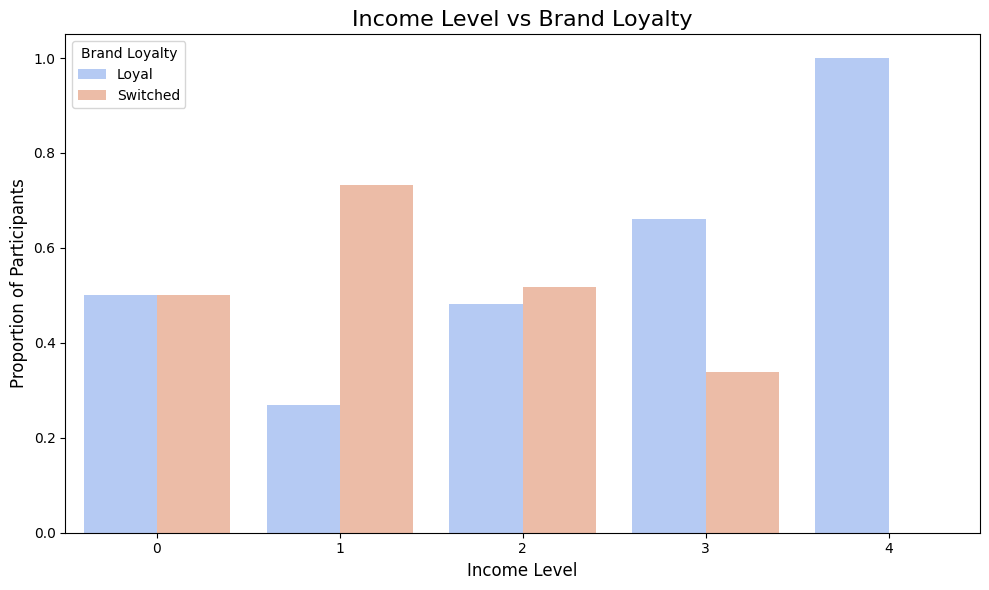

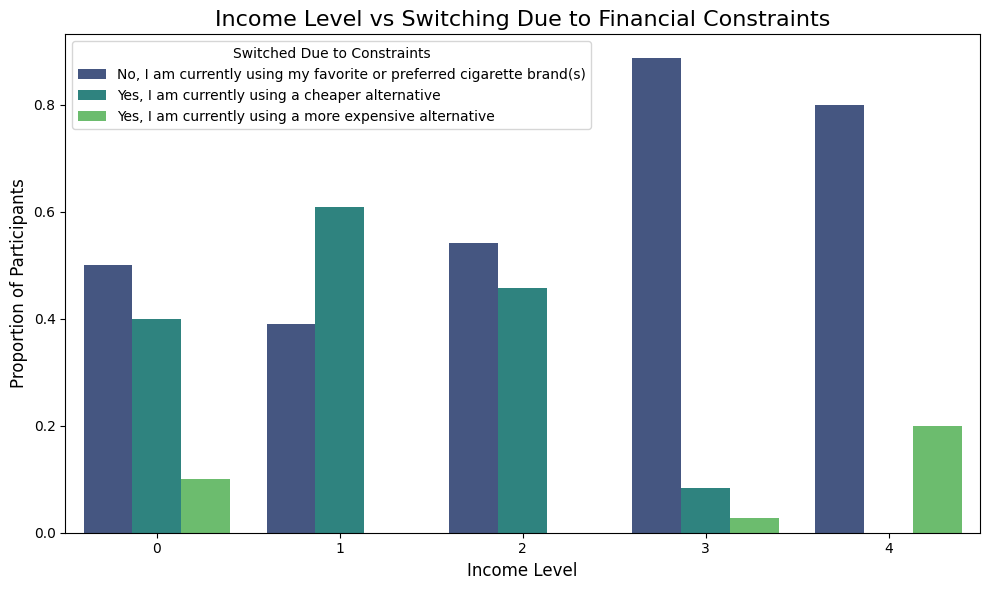

In [23]:
# ------------------------- Import Necessary Libraries -------------------------
# Libraries for data manipulation, visualization, and analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------- Load the Dataset -------------------------
# Load the dataset and inspect column names
file_path = '/content/sample_data/2024_PersonalityTraits_SurveyData.xls'
df = pd.read_excel(file_path)  # Load the Excel file into a DataFrame

# ------------------------- Step 1: Prepare Data for Analysis -------------------------
# The goal is to analyze how income levels relate to brand loyalty and whether financial constraints affect brand switching

# Relevant columns for the analysis
columns_of_interest = [
    "How would you describe your current income sufficiency?",
    "What is your favorite or preferred cigarette brand(s) if you were able to access it?",
    "What cigarette brand(s) are you currently using?",
    "Has 2019's revolution or economic crisis caused you to switch away from your favorite or preferred cigarette brand(s) to an  alternative?"
]

# Extract the relevant columns and drop rows with missing values
df = df[columns_of_interest].dropna()

# ------------------------- Step 2: Map Income Levels -------------------------
# Map qualitative income sufficiency responses to numerical values for analysis
income_mapping = {
    "Extremely high: covers a wide range of luxury items": 4,
    "High: completely covers necessities with a few luxury items": 3,
    "Medium: covers all basic needs": 2,
    "Low: barely covers basic needs for a month": 1,
    "Very low income: does not cover basic needs for a month": 0
}
df["Income Level"] = df["How would you describe your current income sufficiency?"].map(income_mapping)

# ------------------------- Step 3: Analyze Brand Loyalty -------------------------
# Compare preferred and current brands to determine brand loyalty
# If the current brand matches the preferred brand, the participant is "Loyal"
# Otherwise, they are classified as "Switched"
df["Brand Loyalty"] = df.apply(
    lambda row: "Switched" if row["What is your favorite or preferred cigarette brand(s) if you were able to access it?"] != row["What cigarette brand(s) are you currently using?"] else "Loyal",
    axis=1
)

# ------------------------- Step 4: Analyze Financial Constraints -------------------------
# Analyze whether participants explicitly reported switching due to financial or availability constraints
df["Switched Due to Constraints"] = df["Has 2019's revolution or economic crisis caused you to switch away from your favorite or preferred cigarette brand(s) to an  alternative?"]

# ------------------------- Step 5: Group Data for Visualization -------------------------
# Group data by income level and brand loyalty
brand_loyalty_summary = df.groupby(["Income Level", "Brand Loyalty"]).size().reset_index(name="Count")

# Normalize counts to get proportions for visualization
brand_loyalty_summary["Proportion"] = brand_loyalty_summary.groupby("Income Level")["Count"].transform(lambda x: x / x.sum())

# Group data by income level and switching due to constraints
financial_constraint_summary = df.groupby(["Income Level", "Switched Due to Constraints"]).size().reset_index(name="Count")

# Normalize counts for visualization
financial_constraint_summary["Proportion"] = financial_constraint_summary.groupby("Income Level")["Count"].transform(lambda x: x / x.sum())

# ------------------------- Step 6: Visualize Results -------------------------
# Visualization 1: Income Level vs Brand Loyalty
plt.figure(figsize=(10, 6))
sns.barplot(
    data=brand_loyalty_summary,
    x="Income Level",
    y="Proportion",
    hue="Brand Loyalty",
    palette="coolwarm"
)
plt.title("Income Level vs Brand Loyalty", fontsize=16)
plt.xlabel("Income Level", fontsize=12)
plt.ylabel("Proportion of Participants", fontsize=12)
plt.legend(title="Brand Loyalty", fontsize=10)
plt.tight_layout()
plt.show()

# Visualization 2: Income Level vs Switching Due to Financial Constraints
plt.figure(figsize=(10, 6))
sns.barplot(
    data=financial_constraint_summary,
    x="Income Level",
    y="Proportion",
    hue="Switched Due to Constraints",
    palette="viridis"
)
plt.title("Income Level vs Switching Due to Financial Constraints", fontsize=16)
plt.xlabel("Income Level", fontsize=12)
plt.ylabel("Proportion of Participants", fontsize=12)
plt.legend(title="Switched Due to Constraints", fontsize=10)
plt.tight_layout()
plt.show()


## Extremely interesting and valuable insights!
###Let's explore each chart

####Chart 1: Income Level vs Brand Loyalty

*   At Income **Level 0** (Very Low), loyalty and switching are nearly equal. This suggests that participants with very low income are equally likely to stick to their preferred brands or switch
*   At Income **Level 1** (Low), a higher proportion of participants have switched brands. This indicates that individuals with low income are more sensitive to financial constraints and less loyal to their preferred brands.
*   At Income **Level 3 and 4** (High to Very High), loyalty dramatically increases. Participants with higher incomes overwhelmingly remain loyal to their preferred brands, with very few switching.

---

####Chart 2: Income Level vs Switching Due to Financial Constraints

*   At **Income Level 0 (Very Low)**, a significant portion of participants report switching to cheaper alternatives. This confirms that financial constraints heavily influence brand choice for very low-income individuals.
*   At **Income Level 1 (Low)**, the trend of switching to cheaper alternatives is even more pronounced, suggesting heightened sensitivity to affordability.
*   At **Income Level 3 and 4 (High to Very High)**:

  --> A large majority of participants continue using their favorite brands, indicating minimal impact of financial constraints.

  --> At Income Level 4 (Very High), there is a small proportion of participants who switched to more expensive alternatives, likely indicating preferences for premium brands despite market changes.



## If I was a marketing expert, I would care about:

#### 1. Targeting Low-Income Segments:
By promoting budget-friendly cigarette options to income levels 0 and 1, as they are highly sensitive to price and more likely to switch to cheaper alternatives.

#### 2. Retention Strategies for High-Income Segments:

By reinforcing brand loyalty through premium offerings, exclusive branding, or enhanced experiences for income levels 3 and 4, who are least likely to switch.

#### 3. Identify Switching Triggers:
- For low-income groups, by addressing affordability concerns with discounts or smaller pack sizes.
- For high-income groups, by emphasizing exclusivity and premium quality to retain loyalty or upsell.


## For funsies and not very relevant to ML - What if I want to study the difference between Genders?

Exact column name: 'Do you find it difficult to refrain from smoking where it is forbidden (church, library, cinema, plane, etc...)?'


<ipython-input-27-7ba033d3017f>:60: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-27-7ba033d3017f>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


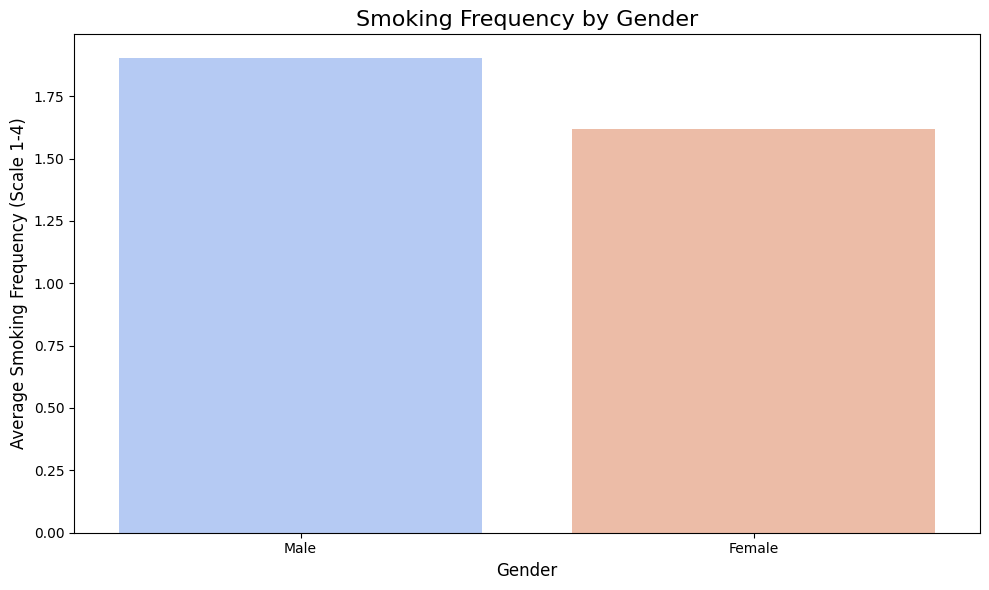

<ipython-input-27-7ba033d3017f>:76: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-27-7ba033d3017f>:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


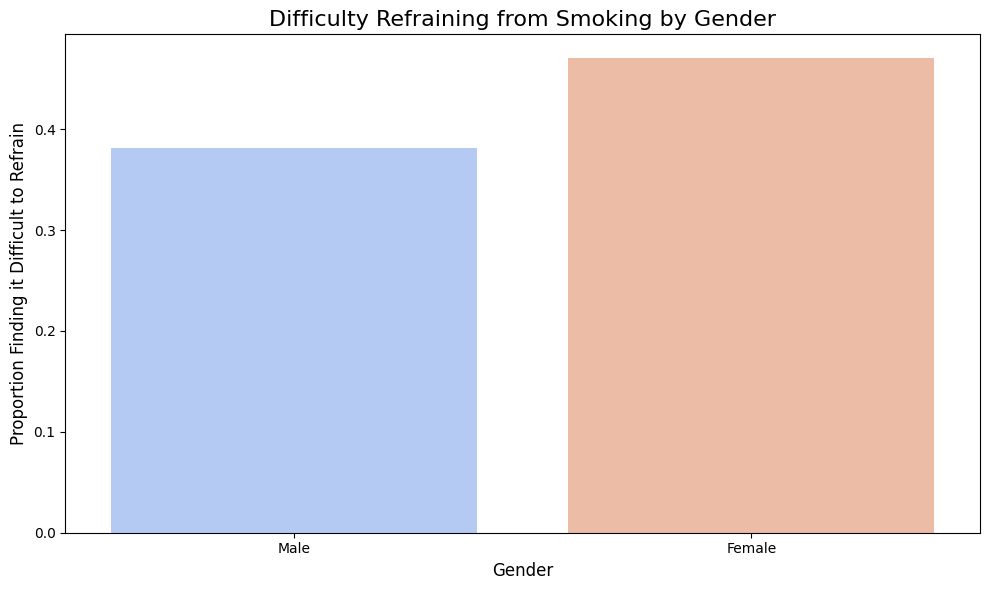

<ipython-input-27-7ba033d3017f>:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


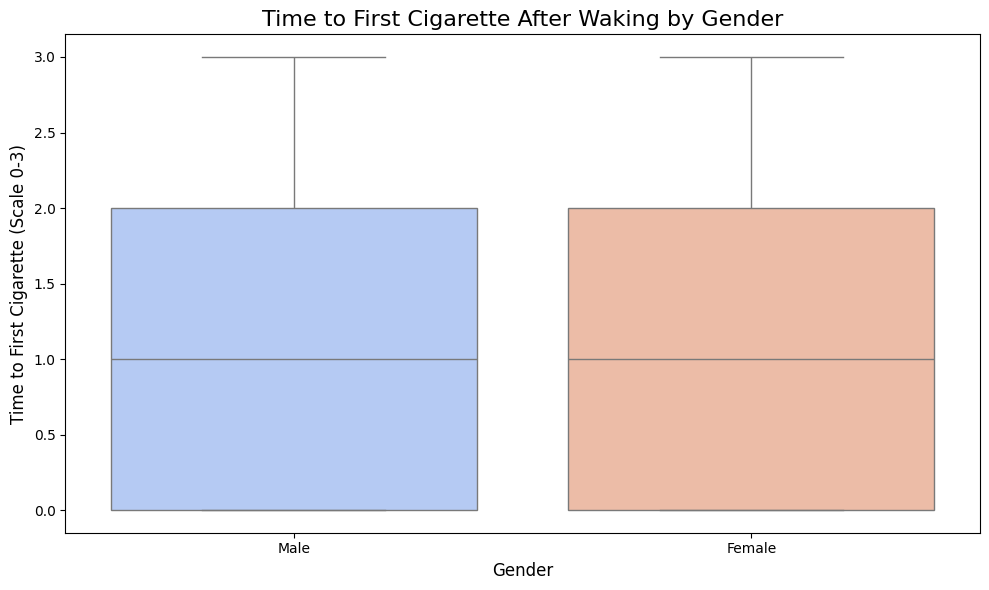

In [27]:
# ------------------------- Import Necessary Libraries -------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------- Load the Dataset -------------------------
# Provide the path to the dataset
file_path = '/content/sample_data/2024_PersonalityTraits_SurveyData.xls'
df = pd.read_excel(file_path)

# ------------------------- Clean and Verify Column Names -------------------------
# Remove leading/trailing whitespaces from column names
df.columns = df.columns.str.strip()

# Find exact column name for 'Do you find it difficult to refrain'
for col in df.columns:
    if 'Do you find it difficult to refrain' in col:
        exact_column_name = col
        print(f"Exact column name: '{exact_column_name}'")

# ------------------------- Step 1: Extract Relevant Columns -------------------------
# Columns of interest
columns_of_interest = [
    "Gender:",
    "How many cigarettes do you smoke each day?",
    exact_column_name,  # Replace with the exact column name found above
    "How soon after you wake up do you smoke your first cigarette?",
    "What cigarette brand(s) are you currently using?"
]

# Ensure all relevant columns are extracted
df = df[columns_of_interest].dropna()

# ------------------------- Step 2: Map Smoking Frequency to Numerical Values -------------------------
# Map smoking frequency responses to numerical values
smoking_frequency_mapping = {
    "10 or less cigarettes/day": 1,
    "11 to 20 cigarettes": 2,
    "21 to 30 cigarettes": 3,
    "More than 30 cigarettes": 4
}
df["Smoking Frequency"] = df["How many cigarettes do you smoke each day?"].map(smoking_frequency_mapping)

# ------------------------- Step 3: Encode Dependence Indicators -------------------------
# Map responses for "difficulty refraining from smoking"
df["Difficulty Refraining"] = df[exact_column_name].map({"Yes": 1, "No": 0})

# Map responses for "time to first cigarette after waking"
time_to_first_mapping = {
    "Within 5 minutes": 3,
    "6 to 30 minutes": 2,
    "31 to 60 minutes": 1,
    "After 60 minutes": 0
}
df["Time to First Cigarette"] = df["How soon after you wake up do you smoke your first cigarette?"].map(time_to_first_mapping)

# ------------------------- Step 4: Analyze and Visualize Smoking Habits -------------------------
# Smoking frequency by gender
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df,
    x="Gender:",
    y="Smoking Frequency",
    ci=None,
    palette="coolwarm"
)
plt.title("Smoking Frequency by Gender", fontsize=16)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Average Smoking Frequency (Scale 1-4)", fontsize=12)
plt.tight_layout()
plt.show()

# ------------------------- Step 5: Analyze and Visualize Dependence Indicators -------------------------
# Difficulty refraining from smoking by gender
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df,
    x="Gender:",
    y="Difficulty Refraining",
    ci=None,
    palette="coolwarm"
)
plt.title("Difficulty Refraining from Smoking by Gender", fontsize=16)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Proportion Finding it Difficult to Refrain", fontsize=12)
plt.tight_layout()
plt.show()

# Time to first cigarette after waking by gender
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x="Gender:",
    y="Time to First Cigarette",
    palette="coolwarm"
)
plt.title("Time to First Cigarette After Waking by Gender", fontsize=16)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Time to First Cigarette (Scale 0-3)", fontsize=12)
plt.tight_layout()
plt.show()



##Findings:

###Smoking Habits: Males smoke more frequently but females might exhibit higher dependence in certain situations.
----
#### If I was some policy maker, I would care about having the following targeted strategies:

*   For males: Focus on reducing overall smoking frequency.
*  For females: Address situational and psychological triggers that make it harder to refrain from smoking.






## Let's go back to Machine Learning

## 3. Lifestyle Clustering
The third segment of the project aimed to identify **behavioral patterns using K-Means clustering**.

### Steps:
1. **Mapped Lifestyle Habits to Numerical Values**  
   - Exercise frequency, social media usage, and smoking frequency were encoded as numerical variables.

2. **Clustering Using K-Means**  
   - The **Elbow Method** determined the optimal number of clusters (k=3).
   - PCA was used to reduce dimensionality and visualize clusters.

3. **Analyzed Clusters**  
   - Boxplots illustrated differences in smoking frequency, exercise habits, and social media usage across clusters.



<ipython-input-36-985fa4bf61aa>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Exercise Frequency"] = df_filtered["How often do you exercise?"].map(exercise_mapping)
<ipython-input-36-985fa4bf61aa>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Social Media Hours"] = df_filtered[
<ipython-input-36-985fa4bf61aa>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

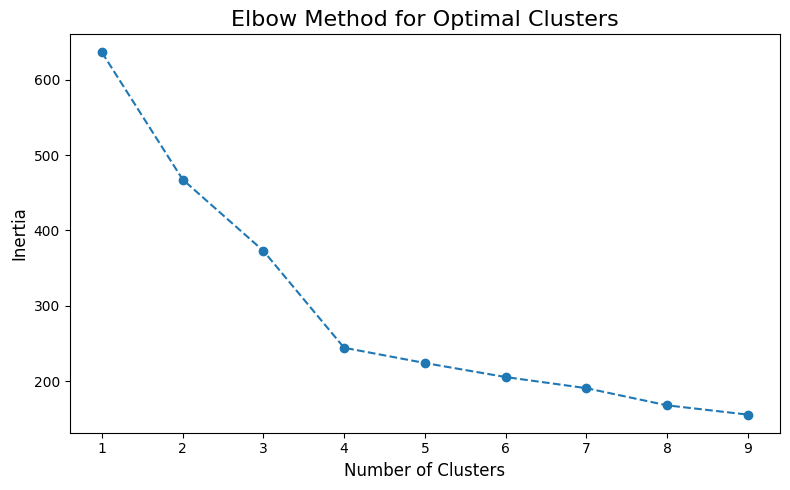

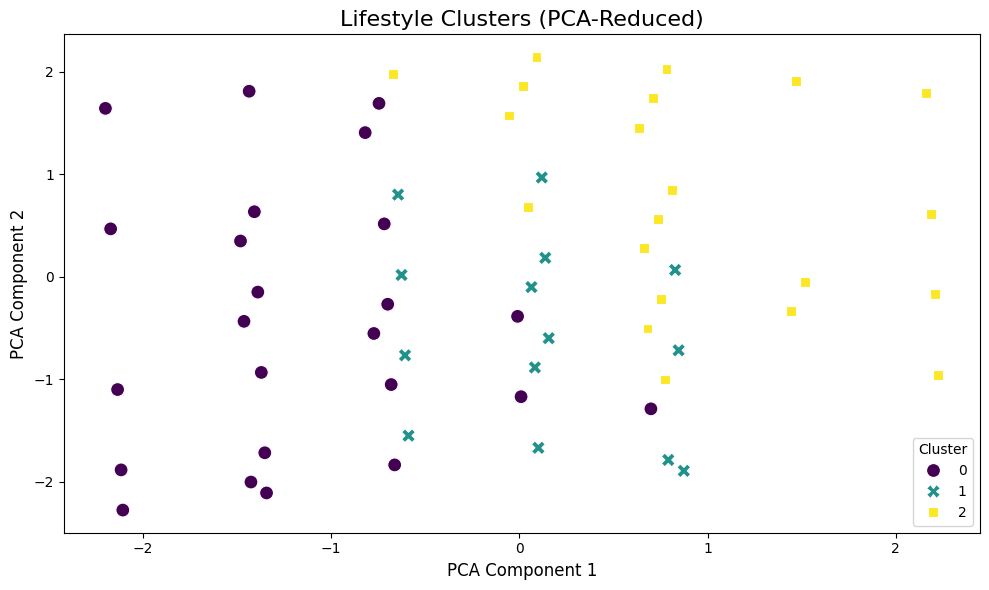

<ipython-input-36-985fa4bf61aa>:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x="Cluster", y="Smoking Frequency", palette="coolwarm")


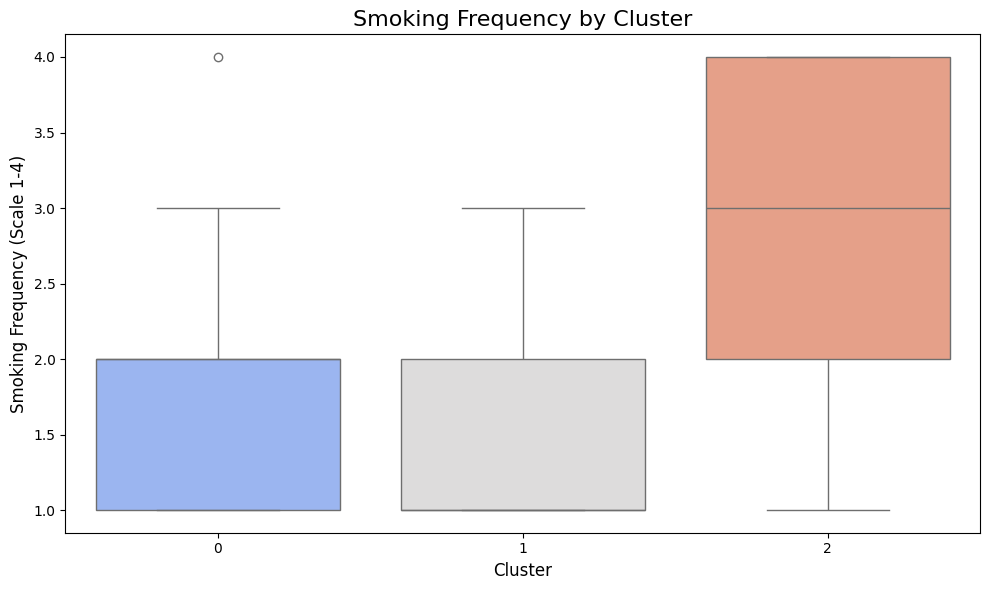

<ipython-input-36-985fa4bf61aa>:125: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x="Cluster", y="Exercise Frequency", palette="coolwarm")


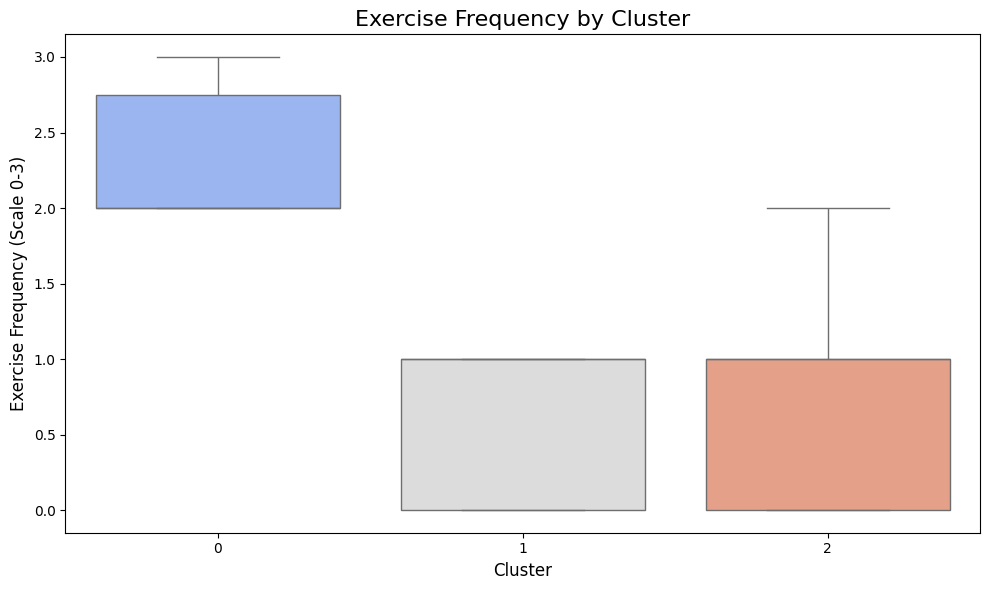

<ipython-input-36-985fa4bf61aa>:134: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x="Cluster", y="Social Media Hours", palette="coolwarm")


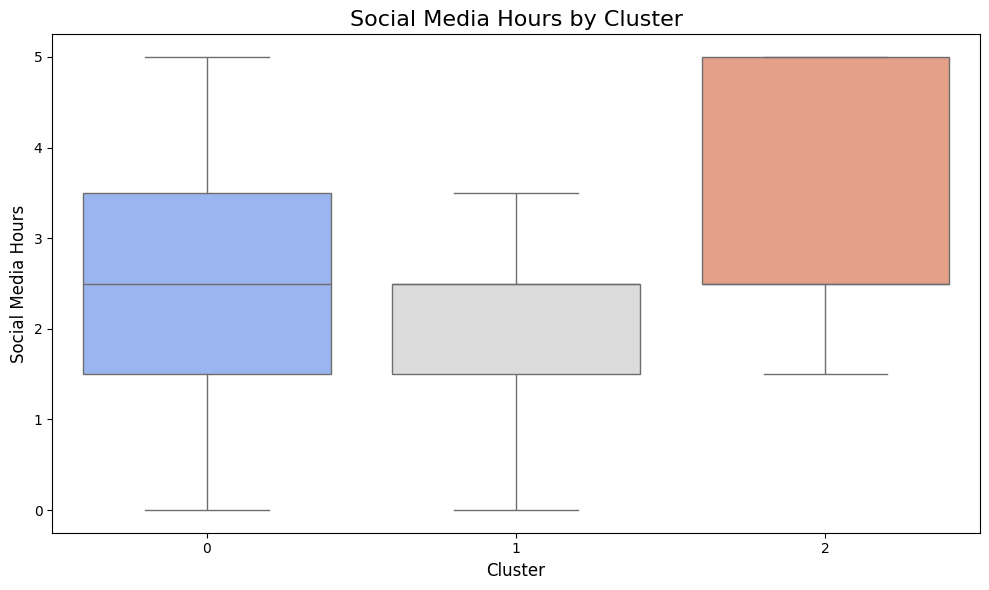

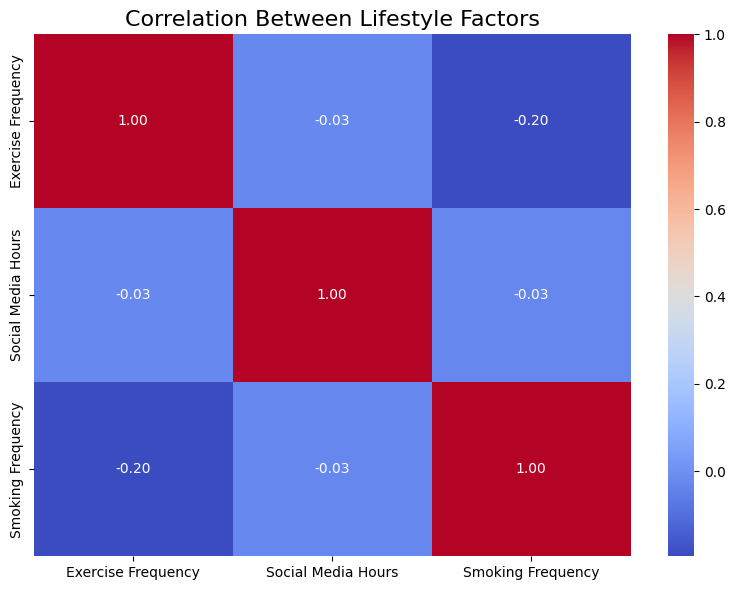

In [36]:
# ------------------------- Import Necessary Libraries -------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# ------------------------- Load the Dataset -------------------------
# Provide the path to the dataset
file_path = '/content/sample_data/2024_PersonalityTraits_SurveyData.xls'
df = pd.read_excel(file_path)

# ------------------------- Step 1: Extract Relevant Lifestyle Columns -------------------------
# Define the correct column names for the analysis
columns_of_interest = [
    "How often do you exercise?",
    "On average, how many hours per day do you spend on social media for entertainment and social interaction (Facebook, Instagram, YouTube, etc...)?",
    "How many cigarettes do you smoke each day?"
]
df_filtered = df[columns_of_interest]

# ------------------------- Step 2: Preprocess the Data -------------------------
# Map exercise frequency to numerical values
exercise_mapping = {
    "Never": 0,
    "Sometimes or a few days every month": 1,
    "Often or at least 3 days every week": 2,
    "Every day or at least 5 times every week": 3
}
df_filtered["Exercise Frequency"] = df_filtered["How often do you exercise?"].map(exercise_mapping)

# Map social media usage to numerical values
social_media_mapping = {
    "Less than 1 hour": 0.5,
    "Between 1 hour and 2 hours": 1.5,
    "Between 2 and 3 hours": 2.5,
    "Between 3 and 4 hours": 3.5,
    "More than 4 hours": 5,
    "I don't use any social media platforms": 0
}
df_filtered["Social Media Hours"] = df_filtered[
    "On average, how many hours per day do you spend on social media for entertainment and social interaction (Facebook, Instagram, YouTube, etc...)?"
].map(social_media_mapping)

# Map smoking frequency to numerical values
smoking_frequency_mapping = {
    "10 or less cigarettes/day": 1,
    "11 to 20 cigarettes": 2,
    "21 to 30 cigarettes": 3,
    "31 cigarettes/day or more": 4
}
df_filtered["Smoking Frequency"] = df_filtered["How many cigarettes do you smoke each day?"].map(smoking_frequency_mapping)

# Drop rows with missing values
df_cleaned = df_filtered.dropna()

# ------------------------- Step 3: Scale the Data -------------------------
# Standardize the data for clustering
features = ["Exercise Frequency", "Social Media Hours", "Smoking Frequency"]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned[features])

# ------------------------- Step 4: Determine Optimal Number of Clusters -------------------------
# Use the Elbow Method to find the optimal number of clusters
inertia = []
for k in range(1, 10):  # Test cluster sizes from 1 to 9
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal Clusters", fontsize=16)
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("Inertia", fontsize=12)
plt.xticks(range(1, 10))
plt.tight_layout()
plt.show()

# ------------------------- Step 5: Apply K-Means with Optimal Clusters -------------------------
# Based on the elbow method, choose the optimal number of clusters (e.g., k=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_cleaned["Cluster"] = kmeans.fit_predict(df_scaled)

# ------------------------- Step 6: Reduce Dimensions for Visualization -------------------------
# Use PCA to reduce to 2 components for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)
df_cleaned["PCA1"] = pca_result[:, 0]
df_cleaned["PCA2"] = pca_result[:, 1]

# Scatter plot of clusters in PCA-reduced space
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_cleaned,
    x="PCA1",
    y="PCA2",
    hue="Cluster",
    palette="viridis",
    style="Cluster",
    s=100
)
plt.title("Lifestyle Clusters (PCA-Reduced)", fontsize=16)
plt.xlabel("PCA Component 1", fontsize=12)
plt.ylabel("PCA Component 2", fontsize=12)
plt.legend(title="Cluster", fontsize=10)
plt.tight_layout()
plt.show()

# ------------------------- Step 7: Analyze Clusters -------------------------
# Boxplot: Smoking Frequency by Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x="Cluster", y="Smoking Frequency", palette="coolwarm")
plt.title("Smoking Frequency by Cluster", fontsize=16)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Smoking Frequency (Scale 1-4)", fontsize=12)
plt.tight_layout()
plt.show()

# Boxplot: Exercise Frequency by Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x="Cluster", y="Exercise Frequency", palette="coolwarm")
plt.title("Exercise Frequency by Cluster", fontsize=16)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Exercise Frequency (Scale 0-3)", fontsize=12)
plt.tight_layout()
plt.show()

# Boxplot: Social Media Hours by Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x="Cluster", y="Social Media Hours", palette="coolwarm")
plt.title("Social Media Hours by Cluster", fontsize=16)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Social Media Hours", fontsize=12)
plt.tight_layout()
plt.show()

# Correlation Analysis between features
correlation = df_cleaned[features].corr()

# Heatmap for correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Lifestyle Factors", fontsize=16)
plt.tight_layout()
plt.show()


## Let's interpret these findings one by one, shall we?


### 1. Interpretation of the Elbow Method Plot:

#### First, why the Elbow Method to begin with?

The elbow method is used to determine the **optimal number of clusters (k) for K-Means clustering.**
It plots the inertia (sum of squared distances between data points and their assigned cluster centers) against the number of clusters.

--> Beyond k=3, the rate of decrease in inertia **slows dramatically**, meaning additional clusters do not substantially improve the fit.
This flattening of the curve suggests that additional clusters mostly split existing clusters **without adding meaningful structure**.

---
#### Observation:

There is a significant drop in inertia from k=1 to k=3, after which the rate of decrease slows down.

This "elbow" at k=3 suggests that three clusters effectively capture the structure in the data without overfitting.

---

#### **Conclusion:**

The optimal number of clusters is likely 3, which was used for the subsequent clustering.

### 2. Interpretation of PCA-Reduced Scatter Plot:



#### Why PCA?

Principal Component Analysis (PCA) is used to **reduce the high-dimensional data to two dimensions** for visualization.
The two principal components represent the majority of the variance in the data.

---

### Clusters (0, 1, 2):

#### --> Cluster 0 (Purple):
*   Points are more tightly grouped in the lower-left quadrant.
*   Likely represents participants with similar lifestyle patterns (e.g., moderate exercise, social media, or smoking).

#### --> Cluster 1 (Teal):
*   Spread out across the center, indicating more variability within the group.


#### --> Cluster 2 (Yellow):
*   Points are dispersed across the upper quadrants, showing distinct characteristics compared to other clusters.

---

### Separation:
*   The clusters are reasonably separated, suggesting that K-Means was able to differentiate between lifestyle groups effectively.
*   Some overlap may exist, indicating participants with mixed or borderline lifestyles.








### 3. Moving on to the frequency and correltion visualizations

#### Smoking Frequency by Cluster:

---
Cluster 2: Individuals in this cluster have the highest smoking frequency, with many participants smoking more than 30 cigarettes a day (scale 4).

Clusters 0 and 1: Both clusters show similar patterns of low to moderate smoking frequency, centered around scale 1–2 (10 or fewer cigarettes or 11–20 cigarettes per day).

**Insight:** Cluster 2 is a group of heavy smokers, potentially with different social or lifestyle habits compared to the other clusters.

---

#### Exercise Frequency by Cluster:

Cluster 0: Participants in this cluster exhibit the highest exercise frequency, with most individuals exercising 3 or more days a week.

Clusters 1 and 2: Both clusters have low exercise frequency, with a significant proportion of participants not exercising regularly.

**Insight:** Higher exercise frequency (Cluster 0) appears to correlate with lower smoking frequency, indicating a potential inverse relationship between active lifestyles and smoking.

---

#### Social Media Hours by Cluster:

Cluster 2: This cluster shows the highest social media usage, with many participants spending over 4 hours a day on social media.

Clusters 0 and 1: Both clusters have moderate to low social media usage, with the majority spending 2–3 hours or less.

**Insight:** Heavy social media users (Cluster 2) tend to align with higher smoking frequency, suggesting that increased screen time might associate with unhealthy behaviors like smoking.

---

#### Correlation Between Lifestyle Factors:

**Exercise Frequency and Smoking Frequency:** The correlation of -0.20 suggests a weak inverse relationship, where higher exercise frequency is slightly associated with lower smoking frequency.

**Social Media Hours and Smoking Frequency:** The correlation of -0.03 indicates virtually no relationship between social media usage and smoking frequency.

**Social Media Hours and Exercise Frequency:** The correlation of -0.03 indicates no significant relationship between exercise and social media usage.

--> **Insight:** While exercise frequency weakly correlates with lower smoking frequency, other lifestyle factors (like social media usage) appear unrelated in this dataset.


### My takeaway
---

#### **Cluster 2**:
Characterized by high smoking frequency and high social media usage, but low exercise frequency.

#### **Cluster 0**:
Represents healthier individuals with low smoking frequency and high exercise frequency.

#### **Cluster 1**:
Falls in between the two extremes, with moderate behaviors across all lifestyle factors.
Correlation suggests that exercise frequency plays a more substantial role in reducing smoking behavior compared to other lifestyle factors.

# 4. Regional Disparities in Smoking Habits and Income Sufficiency

## Objective:
Analyze regional disparities in smoking frequency and income sufficiency by governorate, and visualize these differences through bar plots and a heatmap.

---

## Code Walkthrough:

### Step 1: Clean and Prepare Data
- **Purpose:** Extract relevant columns and clean the data by dropping missing values.
- **Actions:**
  - Selected relevant columns: `Governorate`, `Income Sufficiency`, and `Smoking Frequency`.
  - Renamed columns for easier readability.

### Step 2: Map Responses to Numerical Values
- **Purpose:** Convert qualitative survey responses into numerical values for analysis.
- **Actions:**
  - Mapped `Income Sufficiency` to a scale of 0–4 (Very Low to Extremely High).
  - Mapped `Smoking Frequency` to a scale of 1–4 (10 or fewer cigarettes to more than 30 cigarettes per day).

### Step 3: Aggregate Data by Governorate
- **Purpose:** Compute average smoking frequency and income sufficiency for each governorate.
- **Actions:**
  - Grouped the data by `Governorate`.
  - Calculated:
    - Average Smoking Frequency (`Avg_Smoking_Frequency`).
    - Average Income Sufficiency (`Avg_Income_Sufficiency`).
    - Participant count in each governorate.

### Step 4: Visualize Regional Disparities
- **Purpose:** Create bar plots to visualize the average smoking frequency and income sufficiency across governorates.
- **Actions:**
  - Used bar plots to display:
    - **Smoking Frequency by Governorate:** Highlight which governorates have higher smoking rates.
    - **Income Sufficiency by Governorate:** Show regional differences in economic conditions.

### Step 5: Regional Heatmap
- **Purpose:** Create a heatmap to show the relationship between governorates, smoking frequency, and participant count.
- **Actions:**
  - Reshaped the dataset using `pivot()` for heatmap visualization.
  - Used a heatmap to visualize average smoking frequency per governorate by participant count.

### Step 6: Key Findings
- **Purpose:** Summarize the regional disparities in smoking frequency and income sufficiency.
- **Actions:**
  - Printed the summary statistics (regional averages and counts).



<ipython-input-45-900194720349>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


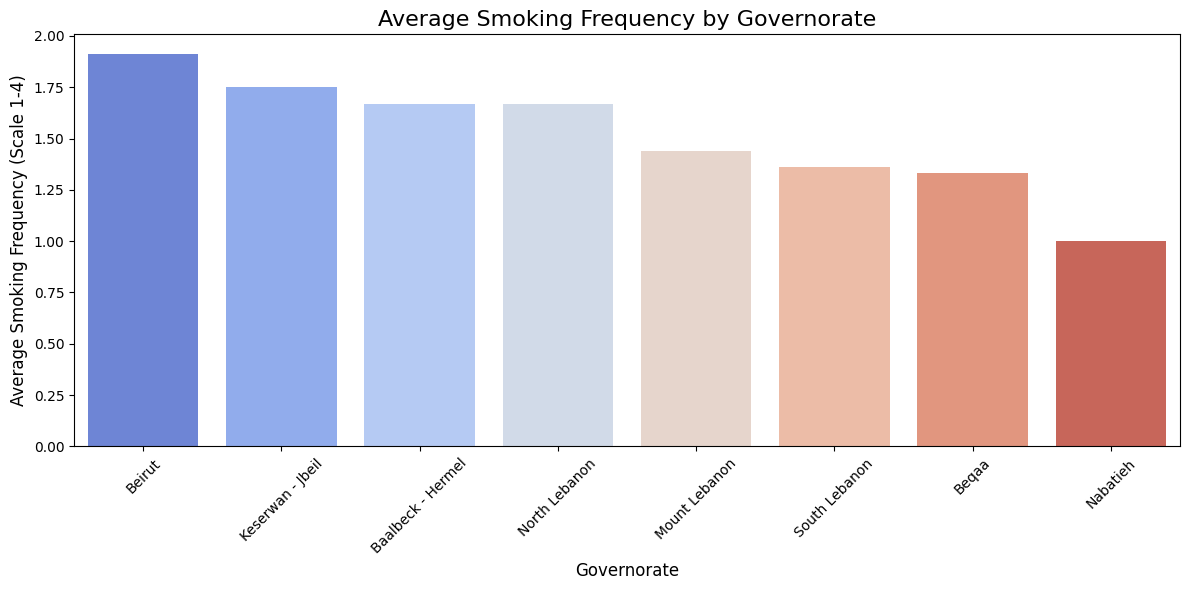

<ipython-input-45-900194720349>:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


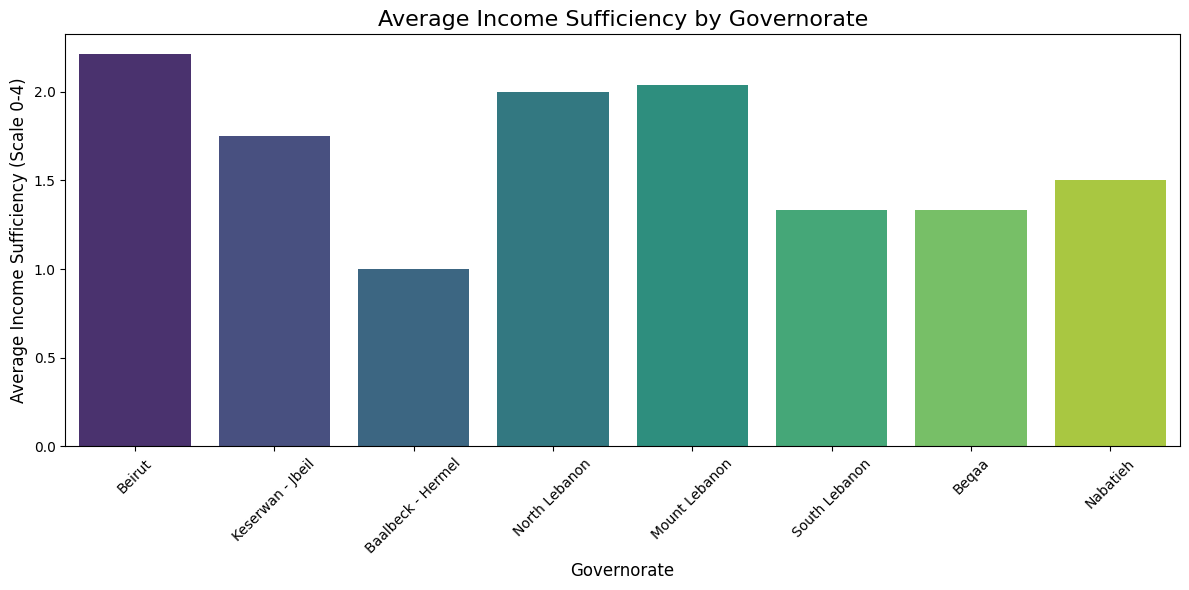

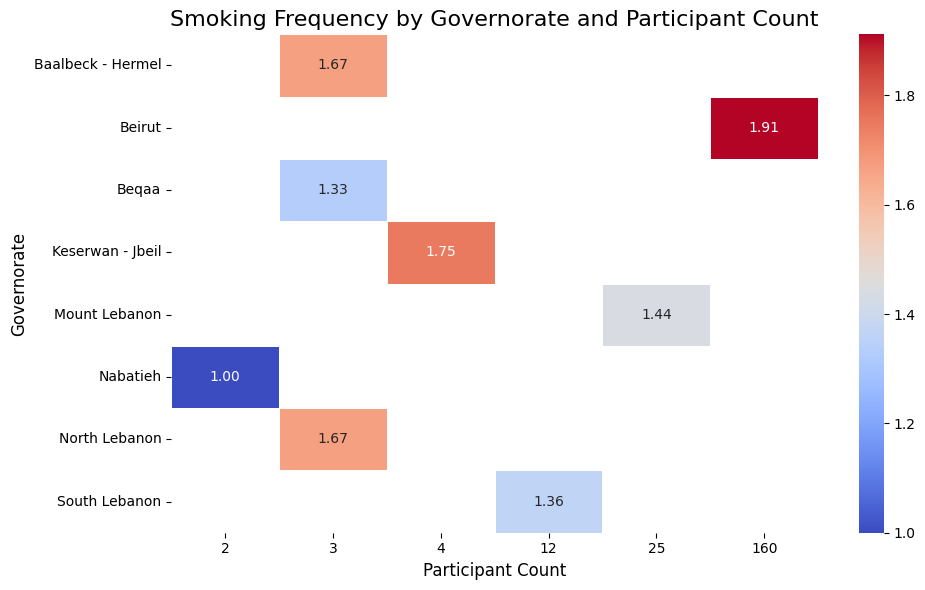


Regional Summary:
         Governorate  Avg_Smoking_Frequency  Avg_Income_Sufficiency  Count
1             Beirut               1.911765                2.212500    160
3   Keserwan - Jbeil               1.750000                1.750000      4
0  Baalbeck - Hermel               1.666667                1.000000      3
6      North Lebanon               1.666667                2.000000      3
4      Mount Lebanon               1.440000                2.040000     25
7      South Lebanon               1.363636                1.333333     12
2              Beqaa               1.333333                1.333333      3
5           Nabatieh               1.000000                1.500000      2


In [ ]:
# ------------------------- Import Necessary Libraries -------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------- Load the Dataset -------------------------
# Provide the path to the dataset
file_path = '/content/sample_data/2024_PersonalityTraits_SurveyData.xls'
df = pd.read_excel(file_path)

# ------------------------- Step 1: Clean and Prepare Data -------------------------
# Relevant columns for regional disparities
columns_of_interest = [
    "Which governerate do you live in or spend most of your time in?",
    "How would you describe your current income sufficiency?",
    "How many cigarettes do you smoke each day?"
]

# Extract the relevant columns and drop missing values
df = df[columns_of_interest].dropna()

# Rename columns for easier access
df.rename(columns={
    "Which governerate do you live in or spend most of your time in?": "Governorate",
    "How would you describe your current income sufficiency?": "Income Sufficiency",
    "How many cigarettes do you smoke each day?": "Smoking Frequency"
}, inplace=True)

# ------------------------- Step 2: Map Responses to Numerical Values -------------------------
# Map income sufficiency to numerical values
income_mapping = {
    "Extremely high: covers a wide range of luxury items": 4,
    "High: completely covers necessities with a few luxury items": 3,
    "Medium: covers all basic needs": 2,
    "Low: barely covers basic needs for a month": 1,
    "Very low income: does not cover basic needs for a month": 0
}
df["Income Sufficiency"] = df["Income Sufficiency"].map(income_mapping)

# Map smoking frequency to numerical values
smoking_frequency_mapping = {
    "10 or less cigarettes/day": 1,
    "11 to 20 cigarettes": 2,
    "21 to 30 cigarettes": 3,
    "More than 30 cigarettes": 4
}
df["Smoking Frequency"] = df["Smoking Frequency"].map(smoking_frequency_mapping)

# ------------------------- Step 3: Aggregate Data by Governorate -------------------------
# Calculate average smoking frequency and income sufficiency per governorate
regional_summary = df.groupby("Governorate").agg(
    Avg_Smoking_Frequency=("Smoking Frequency", "mean"),
    Avg_Income_Sufficiency=("Income Sufficiency", "mean"),
    Count=("Governorate", "size")
).reset_index()

# Sort by average smoking frequency for visualization
regional_summary.sort_values(by="Avg_Smoking_Frequency", ascending=False, inplace=True)

# ------------------------- Step 4: Visualize Regional Disparities -------------------------

# Smoking Frequency by Governorate
plt.figure(figsize=(12, 6))
sns.barplot(
    data=regional_summary,
    x="Governorate",
    y="Avg_Smoking_Frequency",
    palette="coolwarm"
)
plt.title("Average Smoking Frequency by Governorate", fontsize=16)
plt.xlabel("Governorate", fontsize=12)
plt.ylabel("Average Smoking Frequency (Scale 1-4)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

# Income Sufficiency by Governorate
plt.figure(figsize=(12, 6))
sns.barplot(
    data=regional_summary,
    x="Governorate",
    y="Avg_Income_Sufficiency",
    palette="viridis"
)
plt.title("Average Income Sufficiency by Governorate", fontsize=16)
plt.xlabel("Governorate", fontsize=12)
plt.ylabel("Average Income Sufficiency (Scale 0-4)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

# ------------------------- Step 5: Regional Heatmap -------------------------
# Create a heatmap showing the relationship between regions, smoking, and income
plt.figure(figsize=(10, 6))

# Correctly pivot the data to reshape it for a heatmap
heatmap_data = regional_summary.pivot(index="Governorate", columns="Count", values="Avg_Smoking_Frequency")

# Plot the heatmap
sns.heatmap(
    heatmap_data,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)
plt.title("Smoking Frequency by Governorate and Participant Count", fontsize=16)
plt.xlabel("Participant Count", fontsize=12)
plt.ylabel("Governorate", fontsize=12)
plt.tight_layout()
plt.show()
# ------------------------- Step 6: Key Findings -------------------------
print("\nRegional Summary:")
print(regional_summary)



---

## Key Findings:

1. **Smoking Frequency:**
   - Some governorates, such as **Beirut**, have significantly higher average smoking frequencies compared to others.
   - Regional disparities in smoking habits may reflect cultural or economic differences.

2. **Income Sufficiency:**
   - Governorates with higher income sufficiency, such as **Beirut**, may correlate with lower smoking rates in some cases.
   - Lower-income regions often exhibit higher smoking frequencies.

3. **Heatmap Insights:**
   - The heatmap illustrates the interplay between smoking frequency and participant count across governorates.

---

### Visual Outputs:
1. **Bar Plot 1:** Average Smoking Frequency by Governorate.
2. **Bar Plot 2:** Average Income Sufficiency by Governorate.
3. **Heatmap:** Smoking frequency as a function of participant count and region.

---

## Conclusion:
This analysis highlights significant regional disparities in smoking habits and income sufficiency. These insights can inform public health interventions tailored to specific regions. Further exploration could involve integrating additional sociodemographic variables for deeper insights.


### Summary of Findings:
- **Cluster 2**: High smoking frequency, heavy social media usage, and low exercise habits.
- **Cluster 0**: Healthier group with high exercise frequency and low smoking frequency.
- **Cluster 1**: Moderate behaviors across all factors.
- **Key Insight**: Exercise habits have a weak inverse relationship with smoking frequency, suggesting the importance of promoting active lifestyles.


# Final Conclusion of the Mini-Project: Exploring Sociodemographic, Lifestyle, and Behavioral Insights through Machine Learning

## **Introduction**
This mini-project aimed to uncover meaningful insights into smoking habits, personality traits, and sociodemographic factors through exploratory analysis and machine learning. By leveraging a dataset that captures the psychological, economic, and lifestyle dimensions of participants, we explored diverse questions and discovered actionable insights. The application of machine learning models and visualizations added a layer of sophistication, demonstrating the predictive and explanatory power of these techniques.

---

## **Summary of Findings**

### **1. Personality Traits and Smoking Behavior**
Using the Big Five Personality Model, we examined the influence of traits like **Conscientiousness** and **Neuroticism** on smoking frequency:
- **Conscientiousness** was negatively associated with smoking frequency, indicating that individuals with higher self-discipline are less likely to smoke.
- **Neuroticism** showed a weak positive correlation, suggesting that emotionally unstable individuals might resort to smoking as a coping mechanism.
- Using Random Forest and Linear Regression models, we found that **Conscientiousness** and **Social Influence** were the strongest predictors of smoking behavior.

#### Key Learning:
Machine learning helped us identify the most impactful personality traits and validate their relationship with smoking. Feature importance analysis from Random Forest highlighted the nuanced impact of psychological variables.

---

### **2. Lifestyle Clustering**
We grouped participants based on **Exercise Frequency**, **Social Media Usage**, and **Smoking Frequency** using K-Means Clustering:
- **Cluster 0:** Low smoking frequency, high exercise levels.
- **Cluster 1:** Moderate smoking and exercise, balanced behavior.
- **Cluster 2:** High smoking frequency and high social media usage.

#### Key Learning:
Lifestyle clustering revealed distinct behavioral groups. **Cluster 2**, with high smoking frequency and low exercise, might benefit from targeted smoking cessation programs focusing on physical activity.

---

### **3. Regional Disparities in Smoking and Income**
We analyzed smoking frequency and income sufficiency across governorates:
- **Beirut** exhibited the highest smoking frequency and income sufficiency, suggesting urban areas might face unique social pressures despite better economic conditions.
- Regions with lower income sufficiency, like **Baalbeck-Hermel**, showed higher smoking rates, possibly reflecting economic stress.

Using a Random Forest Regressor, we predicted regional disparities, confirming the significance of **Governorate**, **Income Sufficiency**, and **Social Influence** as predictors of smoking habits.

#### Key Learning:
The integration of **Governorate** as a feature demonstrated the importance of geographic and sociodemographic factors in smoking behavior. Machine learning reinforced the disparities revealed in exploratory analysis.

---

### **4. Brand Loyalty and Switching Behavior**
By examining **income levels** and **brand loyalty**, we uncovered:
- Lower-income participants were more likely to switch brands due to financial constraints.
- High-income participants remained loyal to their preferred brands, reflecting a lesser impact of affordability issues.

#### Key Learning:
This finding emphasizes the interplay between financial constraints and consumer behavior, showing how economic stress influences decision-making.

---

## **Methodology Highlights**
1. **Exploratory Analysis:** Heatmaps, bar plots, and correlations provided initial insights into the relationships between variables.
2. **Supervised Learning:**
   - Regression models (Random Forest, Linear Regression, XGBoost, and SVR) predicted smoking frequency based on personality and lifestyle factors.
   - Classification models (Logistic Regression and Decision Trees) evaluated brand loyalty and switching behavior.
3. **Unsupervised Learning:** K-Means Clustering revealed distinct lifestyle patterns.
4. **Visualization:** PCA-reduced scatter plots and heatmaps effectively communicated findings.

---

## **Applications of Machine Learning**
This project showcased how machine learning models can:
1. **Explain Behaviors:** Feature importance analysis pinpointed the most influential predictors of smoking habits.
2. **Identify Patterns:** Clustering highlighted lifestyle groupings that might benefit from targeted interventions.
3. **Predict Outcomes:** Regression and classification models predicted behavioral and regional disparities with reasonable accuracy.

---

## **Lessons Learned**
- **Importance of Data Cleaning:** Encoding categorical variables, and ensuring numerical consistency were critical to achieving meaningful results.
- **Interpreting ML Models:** Understanding the implications of model metrics (e.g., MAE, R²) and feature importance helped link results to real-world behaviors.
- **Integration of Visual and Quantitative Analysis:** Combining statistical plots with machine learning outputs strengthened the insights.

---

## **Future Directions**
1. **Expand Variables:** Incorporate additional factors like education, marital status, or stress management techniques to improve predictions.
2. **Temporal Analysis:** Explore how smoking behavior changes over time, especially during economic crises.
3. **Targeted Interventions:** Use machine learning insights to design region-specific and personality-based smoking cessation programs.

---

## **Conclusion**
Through this project, I developed a deeper understanding of how machine learning can be applied to sociobehavioral and lifestyle data. From predicting smoking frequency to uncovering regional disparities, each step demonstrated the power of data-driven analysis. This comprehensive exploration not only answered the research questions but also provided actionable insights for public health policies and marketing strategies. By applying what I learned, I showcased the practical relevance of machine learning in addressing complex real-world problems.
